# Salary Classification By Using Decision Tree

Author: Kevin Xu

Course Project, UC Irvine, Math 10, F22

## Introduction



I chose this dataset that counted people's age, education level, situation in the household, type of company they work for, and whether their salary was over 50k, etc. The purpose of this project is to classify each person’s salary is whether higher than 50k by their age, education level, family situation, etc. I think this will help each employee plan their career path better and will also help company to better distribute the salary. And there are four steps in my project. First I will use pandas to clean the data, and second I will plot a lot of interesting chart to visualize my data to help people learn more about my data. Third, I will build the decision tree, and the last step is to use train_test_split to test the accuracy. And my project is supervised learning in machine learning, and I did it with classification.

## Introduce Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import altair as alt
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
df = pd.read_csv("salary.csv")
df

age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loss  hours-per-week  native-country  \
0         Male          2174             0              40   United-States   
1         Male             0             0              13   United-States   
2         Male             0             0              40   United-States   
3         Male             0             0              40   United-States   
4       Female             0             0              40            Cuba   
...        ...           ...           ...             ...             ...   
32556   Female             0             0              38   United-States   
32557     Male             0             0              40   United-States   
32558   Female             0             0              40   United-States   
32559     Male             0             0              20   United-States   
32560   Female         15024             0              40   United-States   

       salary  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

Here I introduce my data and import all necessary tools. My data records whether a person's salary is higher than 50K. This record is analyzed according to many aspects of a person, such as age, workclass, education level, marital status and so on. Here is the full name of each column:  

Columns are:
age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
salary: <=50K or >50K

## Use Pandas Series to clean Data and then classify Data

In [2]:
df.dropna()
df.duplicated().sum()
df.drop_duplicates(keep = 'first' , inplace=True)
for loc in df.columns:
    print(df[loc].value_counts())

36    898
31    888
34    886
23    876
35    875
     ... 
83      6
85      3
88      3
86      1
87      1
Name: age, Length: 73, dtype: int64
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
164190    13
123011    13
203488    13
121124    12
148995    12
          ..
209392     1
218551     1
201204     1
362999     1
145522     1
Name: fnlwgt, Length: 21648, dtype: int64
 HS-grad         10494
 Some-college     7282
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: education, dtype: int6

First I want to drop those missing values and then I want to drop those duplicate rows and remain the first one, also I want to use value.counts() to count the values in columns, after I count the value, I find that there are many question marks in columns "workclass","occupation","native-country", and I want to replace those question marks with the most frequent value in each columns.

In [3]:
df['workclass'] = df['workclass'].str.replace('?', 'Private' )
df['occupation'] = df['occupation'].str.replace('?', 'Prof-specialty' )
df['native-country'] = df['native-country'].str.replace('?', 'United-States' )

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


After I finished replacing question marks, I found that there were many different values in many columns, which was not conducive for me to do data visualization, so I needed to classify some different values according to my needs. For example, I will divide workclass into four categories and education into five categories. I only classify three columns because I need to use other columns to make charts.

In [4]:
df["workclass"].replace(["Self-emp-not-inc","Self-emp-inc"],"self-emp",inplace = True)
df["workclass"].replace(["Federal-gov","Local-gov"],"gov",inplace = True,regex = True)
df["workclass"].replace(["Without-pay","Never-worked"],"unemp",inplace=True,regex=True)

In [5]:
df['education'].replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th','HS-grad'], 'lower' ,inplace = True , regex = True)
df['education'].replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'medium' , inplace = True , regex = True)

In [6]:
df['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married' , inplace=True , regex = True)
df['marital-status'].replace(['Divorced', 'Separated','Widowed', 'Married-spouse-absent' , 'Never-married'] ,"single",inplace = True,regex=True)

## Data visualization

In order to better understand the data, I make a lot of interesting charts

In [7]:
alt.Chart(df.sample(5000)).mark_bar().encode(
    x = alt.X("education",scale = alt.Scale(zero=False)),
    y=alt.Y("fnlwgt",scale=alt.Scale(zero=False)),
    color = "salary"
).facet(
    "sex"
)

alt.FacetChart(...)

In [8]:
alt.Chart(df.sample(5000)).mark_bar().encode(
    x=alt.X('count()', stack="normalize"),
    y='education-num',
    color='salary'
).facet(
    "sex"
)

alt.FacetChart(...)

Here I make two charts.Since Chart only allows 5000 rows, so we can use 5000 random rows from df,  In the chart above, I use salary to mark the color and facet to divide the chart into male and female. As we can see, a higher degree means you are more likely to earn more than 50k, and almost all doctoral degrees pay more than 50k. But for women, wages are generally lower than for men.

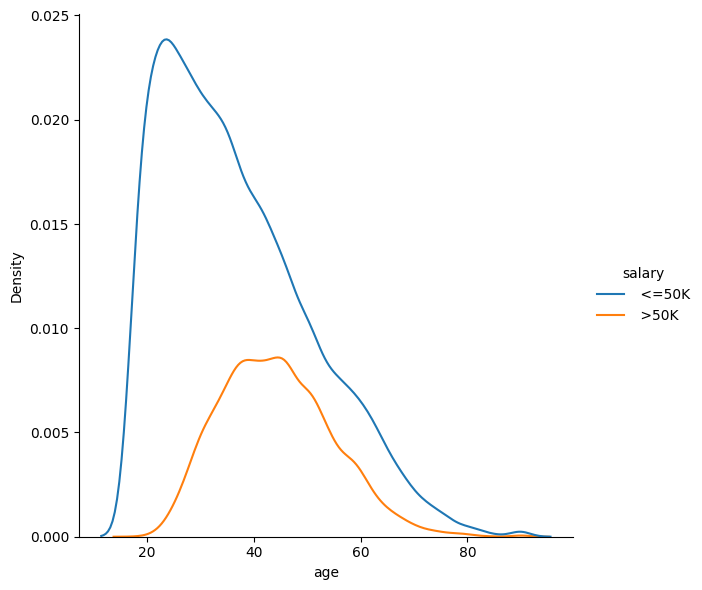

In [9]:
sns.displot(data=df, x="age", hue="salary", kind="kde", height=6, aspect=1)

In [10]:
alt.Chart(df.sample(5000)).mark_point().encode(
    x="age",
    y='fnlwgt',
    color='salary',
    tooltip='education-num'
).facet(
    "sex"
).interactive()

alt.FacetChart(...)

Here I make two charts one is by using seaborn and the other one is by using altair, and also the second chart is interactive chart.As we can see from the charts, a large number of people get a salary of more than 50k when they are between 20 and 40 years old, but the number begins to decline after the age of 40

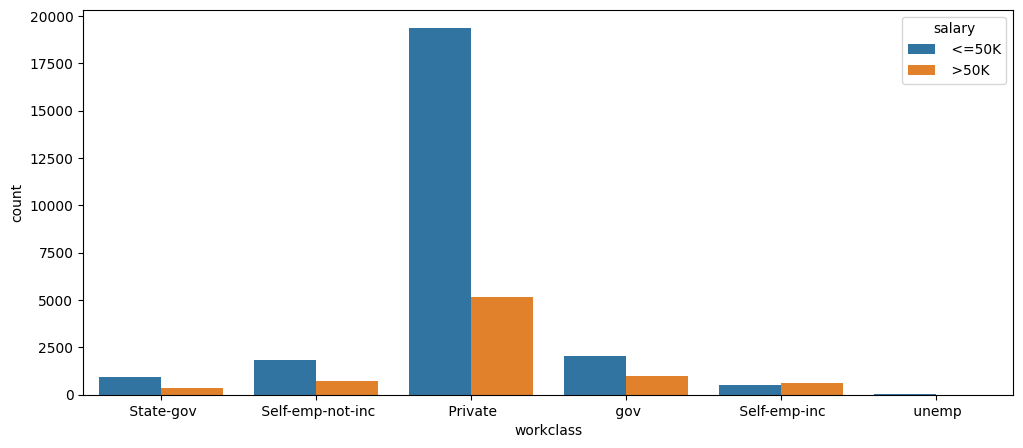

In [11]:
plt.figure(figsize=(12,5))
sns.countplot(data =df , x = 'workclass', hue = 'salary')
plt.show()

According to the bar graph, we can analyze that there are more people working in private enterprises, but from the proportion of count people, I think self-employees are more likely to get a salary of more than 50k

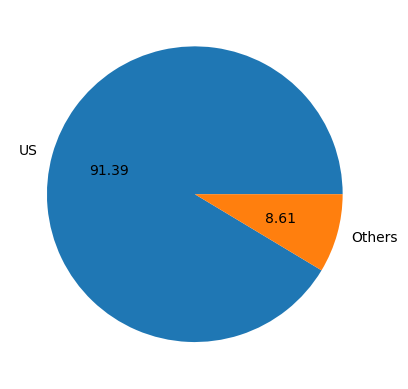

In [12]:
for i in df['native-country'] :
    if i != ' United-States':
        df['native-country'].replace([i] , 'Others' , inplace = True)
plt.pie(df['native-country'].value_counts() , labels = ['US' ,'Others'] , autopct = '%0.2f')
plt.show()

Here I classiy native-country columns to two variables in order to make a better pie. chart. From the pie chart, we can see that most of the data come from United States, So I think this data is not representative, we can ignore the impression of regions for a moment, we can consider all regions as the United States

<AxesSubplot:xlabel='marital-status', ylabel='Count'>

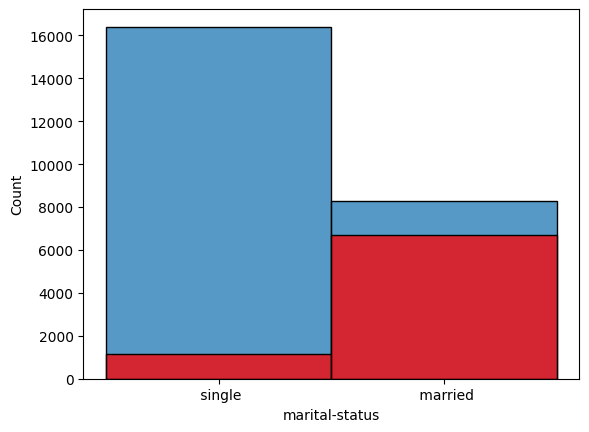

In [13]:
encoder = LabelEncoder()
df["salary_num"] = df["salary"]
df['salary_num'] = encoder.fit_transform(df['salary_num'])
sns.histplot(df[df['salary_num'] ==0]['marital-status'])
sns.histplot(df[df['salary_num'] ==1]['marital-status'] , color='red')

I use laberencoder to mark salary to 0 and 1, so it is easier for me to make the chart. And I make a new column salary_num here becasue I need to drop this column when I use train_test_split. From the Chart we can see that, most of married people earn more than 50k. I use seaborn to make this chart, because I think by using this method we can see more clear.

<AxesSubplot:xlabel='hours-per-week', ylabel='Density'>

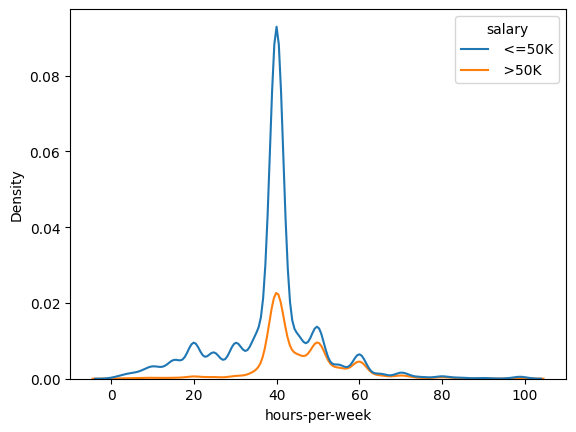

In [14]:
sns.kdeplot(data=df, x='hours-per-week', hue='salary')

Because of laws, most of people work 40 hours a week, so this is real common.

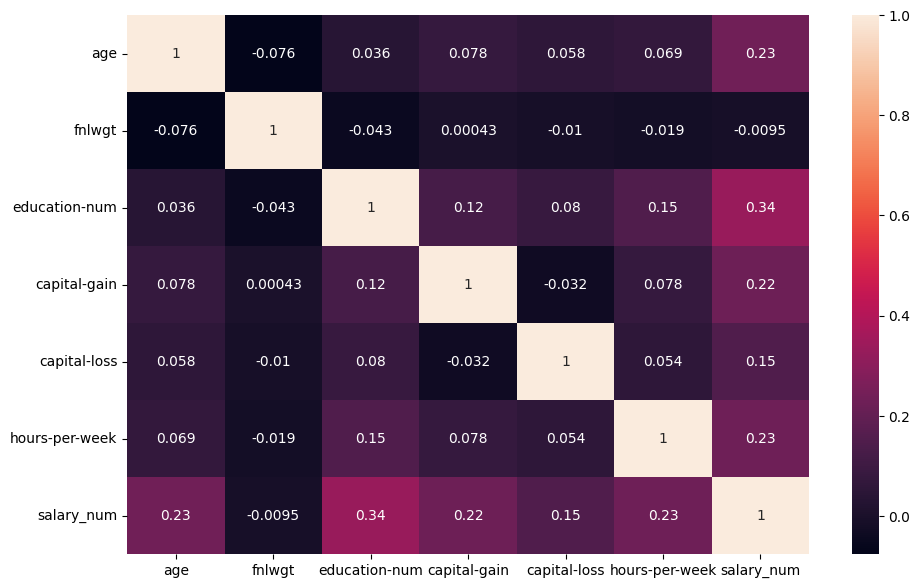

In [15]:
plt.figure(figsize=(11,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

The heat map looks good.

## Decison Tree Classifier

In [16]:
encoder = LabelEncoder()
df = df.drop(["salary_num"],axis =1)
df['sex'] = encoder.fit_transform(df['sex'])
df['workclass'] = encoder.fit_transform(df["workclass"])
df["marital-status"] = encoder.fit_transform(df["marital-status"])
df["race"] = encoder.fit_transform(df["race"])
df["education"] = encoder.fit_transform(df["education"])
df["occupation"] = encoder.fit_transform(df["occupation"])
df["native-country"] = encoder.fit_transform(df["native-country"])
df["relationship"] = encoder.fit_transform(df["relationship"])


Here, we all know that we need to convert string values to integer values to divide the data and build trees. So here I use laberEncoder to convert my data. And I will post the web link in reference.

In [17]:
input_cols = [c for c in df.columns if c != "salary"]
X = df[input_cols]
y = df["salary"]
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.9,random_state=0)

This step is used to split the data, I want to set "salary" column to y and others to X. And I use 90% of the train_size

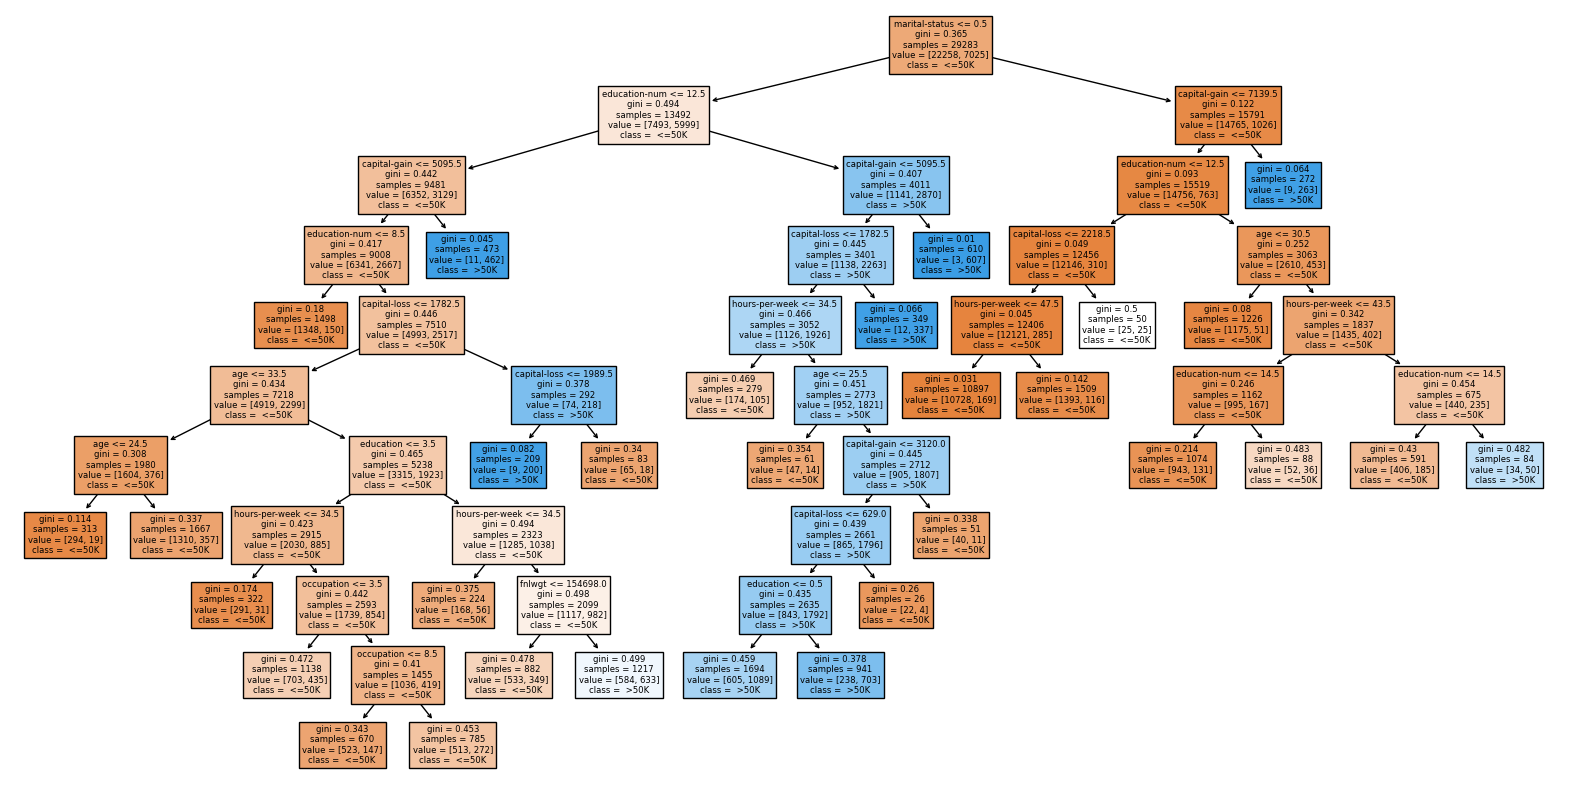

In [18]:
clf = DecisionTreeClassifier(max_leaf_nodes=30, max_depth= 20)
clf.fit(X_train,y_train)
fig = plt.figure(figsize=(20,10))
_=plot_tree(clf,
feature_names=clf.feature_names_in_,
class_names=clf.classes_,
filled=True)

This step is used to build my decision tree. If there is a new person, we can go through this decision tree to classify his condition and finally get his salary whether it is above 50k or below 50k

In [19]:
pd.Series(clf.feature_importances_,index=clf.feature_names_in_).sort_values(ascending = True)

workclass         0.000000
relationship      0.000000
race              0.000000
sex               0.000000
native-country    0.000000
fnlwgt            0.003259
occupation        0.004738
education         0.013617
hours-per-week    0.027949
age               0.035311
capital-loss      0.056571
capital-gain      0.205799
education-num     0.221222
marital-status    0.431533
dtype: float64

This step is to rank feature importance.

In [20]:
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))
accuracy = clf.score(X_test,y_test)*100
f"Accuracy on Test Data : {accuracy} %."

0.8570501656251067
0.8607867240319607


'Accuracy on Test Data : 86.07867240319607 %.'

Here I print train and test accuaracy by using f-string, and the result seems good.

## Summary

Either summarize what you did, or summarize the results.  Maybe 3 sentences.

In my project, I first clean the data, and then I did the data visualization. Then I builed decision tree, after that I test the accuracy. According to the decision tree I made, if there is a new person, we can classify him according to his different conditions and eventually we can determine whether his salary will be higher than 50k.

## References

Your code above should include references.  Here is some additional space for references.

* What is the source of your dataset(s)?

Dataset source: https://www.kaggle.com/datasets/ayessa/salary-prediction-classification

* List any other references that you found helpful.

LabelEncoder: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
heatmap : https://www.geeksforgeeks.org/display-the-pandas-dataframe-in-heatmap-style/
seaborn: https://www.section.io/engineering-education/seaborn-tutorial/

## Submission

Using the Share button at the top right, **enable Comment privileges** for anyone with a link to the project. Then submit that link on Canvas.

https://deepnote.com/workspace/personal-workspace-1d4e-9689-6b3764b5-4ff4-4c89-a8e5-aadbe2a1fd0c/project/Project-Template-Duplicate-e5710c39-a200-48fe-b5a8-872f4ca47b22/%2FCourseProject.ipynb

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=439bbfca-bea7-4768-acaf-698dfd761808' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>